In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('eco.csv')
data.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [3]:
data['Payment_Method'].unique()

array(['Net Banking', 'Credit Card', 'UPI', 'Cash on Delivery',
       'Debit Card'], dtype=object)

In [4]:
data.drop(columns="User_ID")
data.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [5]:
numeric_columns = data.select_dtypes(include = ["float64", "int64"]).columns
correlation_matrix = data[numeric_columns].corr()

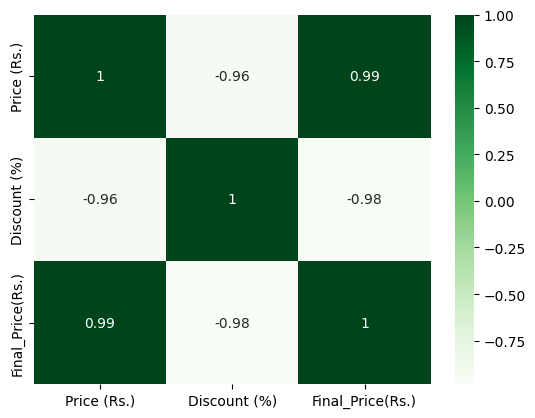

In [6]:
sns.heatmap(correlation_matrix.corr(), annot = True, cmap = "Greens")
plt.show()

In [34]:
x = data.drop(["Payment_Method", "User_ID", "Product_ID", "Purchase_Date", "Category"], axis = 1)
y = data['Category']

In [35]:
x

,Price (Rs.),Discount (%),Final_Price(Rs.)
0,36.53,15,31.05
1,232.79,20,186.23
2,317.02,25,237.76
3,173.19,25,129.89
4,244.80,20,195.84
...,...,...,...
3655,486.79,0,486.79
3656,212.87,15,180.94
3657,389.76,0,389.76
3658,447.66,30,313.36


In [36]:
y

0               Sports
1             Clothing
2               Sports
3                 Toys
4               Beauty
             ...      
3655            Beauty
3656              Toys
3657    Home & Kitchen
3658       Electronics
3659    Home & Kitchen
Name: Category, Length: 3660, dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([5, 2, 5, ..., 4, 3, 4])

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

print('The shape of X_train is : {}'.format(x_train.shape))
print('The shape of X_test is : {}'.format(x_test.shape))
print('The shape of y_train is : {}'.format(y_train.shape))
print('The shape of y_test is : {}'.format(y_test.shape))


The shape of X_train is : (2928, 3)
The shape of X_test is : (732, 3)
The shape of y_train is : (2928,)
The shape of y_test is : (732,)


In [45]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [47]:
pred_test = model.predict(x_test)

In [48]:
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average='micro')
recall = recall_score(y_test, pred_test, average='micro')
f1 = f1_score(y_test, pred_test, average='micro')

print('Confusion matrix Naive Bayes\n', cm)
print('')
print('Akurasi pada data test: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall : %.3f' %recall)
print('f1-score : %.3f' %f1)

Confusion matrix Naive Bayes
 [[ 9  9 30  0 35  0 16]
 [ 6  4 35  0 30  0 20]
 [ 7  5 51  0 42  0 14]
 [ 8  7 31  0 32  0 16]
 [ 9  8 37  0 39  0 24]
 [ 7  7 33  0 38  0 18]
 [ 9  4 37  0 37  0 18]]

Akurasi pada data test: 0.165
precision: 0.165
recall : 0.165
f1-score : 0.165
